In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator
from PIL.Image import core as _imaging
import matplotlib.pyplot as plt
from datetime import datetime
from PIL import Image

In [2]:
our_data = pd.read_json('https://raw.githubusercontent.com/ajakaiye33/ngrnewscorpus/main/data/testy.jsonl',lines=True)

In [3]:
pd.set_option("display.max_rows",1000)

In [6]:
our_data.head()

,title,summary,link,published,scraped_date,keywords
0,There’s nexus between educational backwardness...,Kindly Share This Story:— Gives out educationa...,https://www.vanguardngr.com/2021/04/theres-nex...,04/27/2021,04/27/2021,"[school, poverty, backwardness, overpopulation..."
1,Wike imposes night curfew at all Rivers’ land ...,"Kindly Share This Story:By Davies Iheamnachor,...",https://www.vanguardngr.com/2021/04/wike-impos...,04/27/2021,04/27/2021,"[curfew, imposes, security, wike, view, state,..."
2,Insecurity: Nigerian celebrities cry out to Bu...,Some Nigerian celebrities have urged President...,https://dailypost.ng/2021/04/27/insecurity-nig...,04/27/2021,04/27/2021,"[security, unfit, shots, cry, don, celebrities..."
3,Igbo women's group decry high insecurity in So...,"A women’s group, Mothers of Ndigbo has decried...",https://dailypost.ng/2021/04/27/igbo-womens-gr...,04/27/2021,04/27/2021,"[security, southeast, federal, womens, high, s..."
4,BREAKING: Pandemonium as gunmen storm Ebonyi c...,"By Ogochukwu Anioke, AbakalikiThere was pandem...",https://thenationonlineng.net/breaking-pandemo...,04/27/2021,04/27/2021,"[gunmen, shot, ebonyi, community, pandemonium,..."


In [4]:
today = datetime.now()


In [11]:
def todays_headline(df,col):
    get_date = today.strftime("%m/%d/%Y")
    filter_today = df[col] == get_date
    filter_keyword = df.iloc[:,0]
    show_keywords_today = filter_keyword[filter_today].unique()
    return show_keywords_today

In [12]:
todays_headline(our_data,'scraped_date')

array(['Police brutality: Judicial panel recommends N755m claims for victims in Ondo',
       'Makinde urges S/West PDP chairman to reconcile aggrieved members',
       'Nigerian Senate invites Monguno, Zainab, other over N7.5bn withdrawal from treasury',
       'Nigeria adopts policy for citizens abroad',
       'Impaired learners in poorly-equipped school',
       '2023 polls in danger over delay in passage of Electoral Act amendment',
       'Makinde to Tinubu: APC’ll not rule Nigeria beyond 2023',
       'Blinken: Nigeria Facing Extraordinary Security Challenges',
       'First Bank Appoints Shobo MD/CEO, Adeduntan Retires',
       'REVEALED: Top 5 Hotbeds Of Crimes, Killings In South-East Nigeria',
       'EXTRA: Lagos shuts down illegal abattoirs, donates confiscated meat to orphanage',
       'Ozekhome on insecurity: Buhari missing in action -- someone should wake him up',
       'Tunecore’s Jade Leaf is putting people first as she creates infrastructure for the African music in

In [25]:
def todays_keywords(df,col):
    all_keyword_today = []
    get_date = today.strftime("%m/%d/%Y")
    filter_today = df[col] == get_date
    filter_keyword = df.iloc[:,-1]
    show_keywords_today = filter_keyword[filter_today]
    for news in show_keywords_today:
        for key_words in news:
            all_keyword_today.append(key_words)
    today_text = ",".join(all_keyword_today)
    return today_text

In [26]:
todayz = todays_keywords(our_data,'scraped_date')


In [27]:
def alltime_keywords(df,col):
    all_keyword_alltime = []
    get_date = today.strftime("%m/%d/%Y")
    filter_today = df[col] != get_date
    filter_keyword = df.iloc[:,-1]
    show_keywords_today = filter_keyword[filter_today]
    for news in show_keywords_today:
        for key_words in news:
            all_keyword_alltime.append(key_words)
    full_text = ",".join(all_keyword_alltime)
    return full_text

In [28]:
all_time = alltime_keywords(our_data,'scraped_date')


In [29]:
import random

In [30]:
def viz_word(period):
    png = ['./nig-flag.png','./map-nig2.png']
    path_png = random.choices(png,k=1)[0]
    background = np.array(Image.open(path_png))
    wrdcld = WordCloud(width=50, height=50, background_color='white',mode='RGBA',mask=background).generate(period)
    image_col = ImageColorGenerator(background)
    plt.figure(figsize=[20,20])
    plt.imshow(wrdcld.recolor(color_func=image_col),interpolation='bilinear')
    plt.axis("off")
    return plt.show()


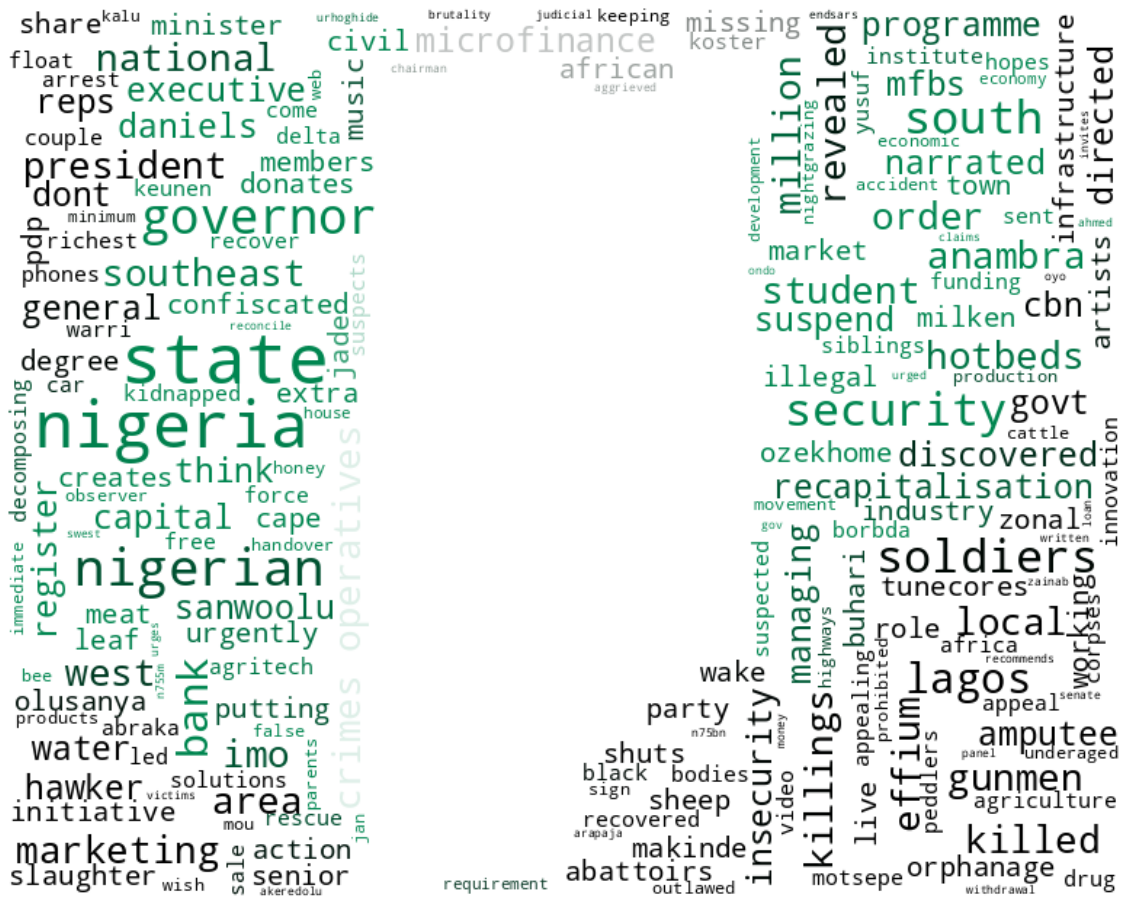

In [31]:
viz_word(todayz)
